In [1]:
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]

## Cases based on the inference result

### These are the possible outcomes in the inference:

#### correct_base_clean: The base non-symbolic way infers correctly - clean accuracy
#### correct_sym_clean: The symbolic way infers correctly - clean symbolic accuracy
#### correct_base_perturbed: The base non-symbolic accuracy after attack - robust non-symbolic accuracy
#### correct_sym_robust: The base non-symbolic accuracy after attack - robust symbolic accuracy


### We are considering the following scenarios or cases based on the combination of above outcomes: 


### <span style="color:blue">  Case 1 :   A general idea of "What went right"  </span>
#### <span style="color:blue"> correct_base_clean:1, correct_sym_clean:1, correct_base_perturbed:1, correct_sym_robust:1 </span>

### <span style="color:red"> Case 2 :  Very bad! the attack not successful on non-symbolic but on the symbolic one. </span>
#### <span style="color:red"> correct_base_clean:1, correct_sym_clean:1, correct_base_perturbed:1, correct_sym_robust:0 </span> 

### <span style="color:blue"> Case 3:  Ah! this is what we want, symbolic inference resists the attack  </span>
#### <span style="color:blue"> correct_base_clean:1, correct_sym_clean:1, correct_base_perturbed:0, correct_sym_robust:1 </span>

### <span style="color:red"> Case 4 :  Attack is strong enough to break symbolic defense  </span>
#### <span style="color:red"> correct_base_clean:1, correct_sym_clean:1, correct_base_perturbed:0, correct_sym_robust:0 </span> 


### <span style="color:red"> Case 5 : clean symbolic inference failed  </span>
### <span style="color:red"> Case 6 : clean base non-symbolic inference failed </span>  

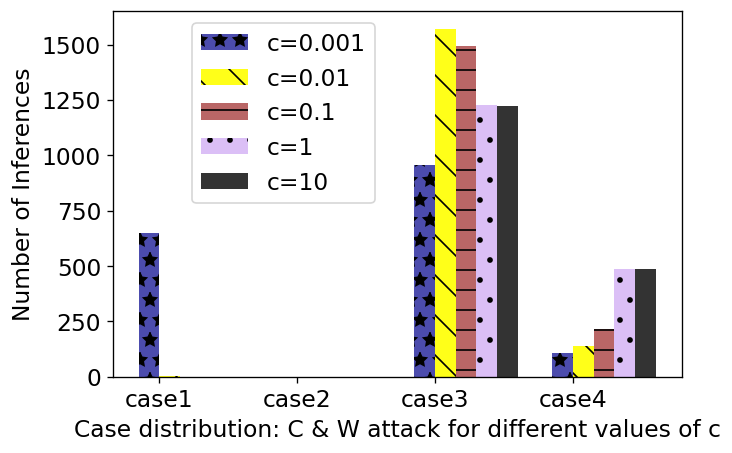

In [3]:
# Small hack in Jupyter
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 120 # 200 e.g. is really fine, but slower
plt.rcParams.update({'font.size': 14})
N = 4
ind = np.arange(N)
cw_c_point001 = (649, 0, 954, 109) #,  122,  166)
cw_c_point01 =  (1, 0, 1571, 140)  #,  122,  166)
cw_c_point1 =   (0, 0, 1495, 217) #,  122,  166)
cw_c_1 =        (0, 0, 1225, 487) #,  122,  166)
cw_c_10 =        (0, 0, 1224, 488) #,  122,  166)


# cw_c_1 =    (649, 0, 954, 109,  122,  166)
# cw_c_10 =   (649, 0, 954, 109,  122,  166)
# cw_c_100 =  (649, 0, 954, 109,  122,  166)

width = 0.15       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, cw_c_point001, width, hatch=patterns[9], alpha=0.7, color='darkblue', log=False)
rects2 = ax.bar(ind+width, cw_c_point01, width, hatch=patterns[1], color='yellow',  alpha=0.9, log=False)
rects3 = ax.bar(ind+2*width, cw_c_point1, width, hatch=patterns[3], color='darkred',  alpha=0.6, log=False)
rects4 = ax.bar(ind+3*width, cw_c_1, width, hatch=patterns[8], color='blueviolet',  alpha=0.3, log=False)
rects5 = ax.bar(ind+4*width, cw_c_10, width,  color='black',  alpha=0.8, log=False)



labels = ('case1', 'case2', 'case3', 'case4')#, 'case5', 'case6')

# add some
ax.set_ylabel('Number of Inferences', fontsize=14)
ax.set_xlabel('Case distribution: C & W attack for different values of c', fontsize=14)
#ax.set_title('Comparison of case distribution in Carlini and Wagner attack for different values of c')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(labels,  fontsize=14)#rotation='vertical',
ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0],rects5[0]), ('c=0.001', 'c=0.01', 'c=0.1', 'c=1', 'c=10'),loc='upper center', bbox_to_anchor=(0.3, 1))# ,loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)
plt.tight_layout()    
#plt.show()
plt.savefig('../cw_case_distributions.png', format='png', dpi=1000)

In [3]:
arr = [954, 1571, 1495, 1225,  1224]
np.mean(arr)
np.std(arr)

220.17756470630698

In [22]:
def analyze_dist(clevel):
    #clevel = str(clevel_float)
    dist_array = np.genfromtxt('./cw_dist_case3/l2_distances_'+clevel+'.txt', delimiter=',')
    #normalize
    da_norm = (dist_array - dist_array.min()) / (dist_array.max() - dist_array.min())
    print("L2 Distance mean: ", np.mean(da_norm))
    print("L2 Distance std:", np.std(da_norm))

    edt_array = np.genfromtxt('./cw_dist_case3/edit_distances_'+clevel+'.txt', delimiter=',')
    ed_norm = (edt_array - edt_array.min()) / (edt_array.max() - edt_array.min())
    print("Edit Distance mean:", np.mean(ed_norm))
    print("Edit Distance std:", np.std(ed_norm))
 
    set_array = np.genfromtxt('./cw_dist_case3/set_difference_'+clevel+'.txt', delimiter=',')
    st_norm =  (set_array - set_array.min()) / (set_array.max() - set_array.min())
    print("Set Difference mean:", np.mean(st_norm))
    print("Set Difference std:", np.std(st_norm))
    return np.mean(da_norm), np.std(da_norm), np.mean(ed_norm), np.std(ed_norm), np.mean(st_norm), np.std(st_norm)

In [25]:
dam_arr, das_arr, edm_arr, eds_arr, stm_arr, sts_arr = [],[],[],[],[],[]

In [26]:
dam, das, edm, eds, stm, sts = analyze_dist('3CW0')
dam_arr.append(dam)
das_arr.append(das)
edm_arr.append(edm)
eds_arr.append(eds)
stm_arr.append(stm)
sts_arr.append(sts)

L2 Distance mean:  0.3424016333109487
L2 Distance std: 0.11040996027925788
Edit Distance mean: 0.12974143955276032
Edit Distance std: 0.07709868202650207
Set Difference mean: 0.2848757112908057
Set Difference std: 0.1441611654960422


In [27]:
dam, das, edm, eds, stm, sts = analyze_dist('3CW1')
dam_arr.append(dam)
das_arr.append(das)
edm_arr.append(edm)
eds_arr.append(eds)
stm_arr.append(stm)
sts_arr.append(sts)

L2 Distance mean:  0.3805227582700514
L2 Distance std: 0.11846962542211872
Edit Distance mean: 0.1990648334765658
Edit Distance std: 0.08218823790207797
Set Difference mean: 0.33652153066538804
Set Difference std: 0.14063695227283401


In [28]:
dam, das, edm, eds, stm, sts = analyze_dist('3CW2')
dam_arr.append(dam)
das_arr.append(das)
edm_arr.append(edm)
eds_arr.append(eds)
stm_arr.append(stm)
sts_arr.append(sts)

L2 Distance mean:  0.28434744484433927
L2 Distance std: 0.10632843400055596
Edit Distance mean: 0.2758002866698519
Edit Distance std: 0.12283181035339585
Set Difference mean: 0.3457176094227134
Set Difference std: 0.15228905307201548


In [29]:
dam, das, edm, eds, stm, sts = analyze_dist('3CW3')
dam_arr.append(dam)
das_arr.append(das)
edm_arr.append(edm)
eds_arr.append(eds)
stm_arr.append(stm)
sts_arr.append(sts)

L2 Distance mean:  0.3573105704249829
L2 Distance std: 0.13421064538455474
Edit Distance mean: 0.35459975275976485
Edit Distance std: 0.13289817526686096
Set Difference mean: 0.3472701080432173
Set Difference std: 0.1507194262339801


In [75]:
dam, das, edm, eds, stm, sts = analyze_dist('3CW4')
dam_arr.append(dam)
das_arr.append(das)
edm_arr.append(edm)
eds_arr.append(eds)
stm_arr.append(stm)
sts_arr.append(sts)

L2 Distance mean:  0.3228587422538438
L2 Distance std: 0.12198592647771986
Edit Distance mean: 0.3557637543150452
Edit Distance std: 0.12955543762851465
Set Difference mean: 0.3472701080432173
Set Difference std: 0.1507194262339801


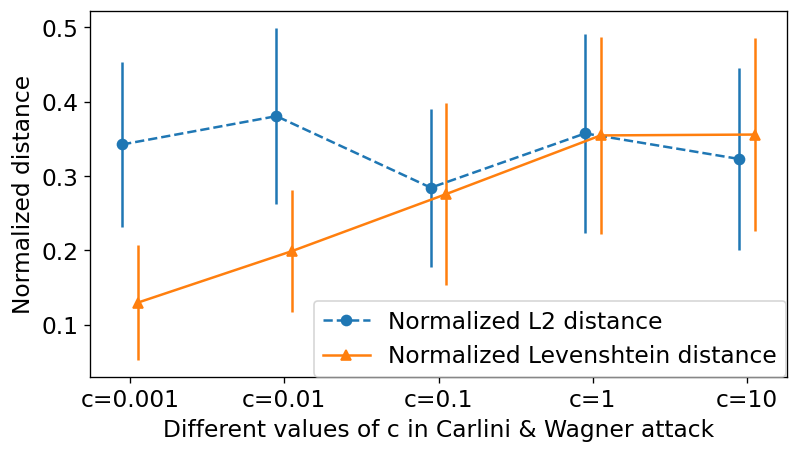

In [106]:
from matplotlib.transforms import Affine2D
# Small hack in Jupyter
plt.rcParams['figure.figsize'] = [7,4]
clevels = ['c=0.001', 'c=0.01', 'c=0.1', 'c=1', 'c=10']

fig, ax = plt.subplots()

aft1 = Affine2D().translate(-0.05, 0.0) + ax.transData
aft2 = Affine2D().translate(+0.05, 0.0) + ax.transData

e1 = ax.errorbar(clevels, dam_arr, yerr= das_arr, marker="o", linestyle="--", label='Normalized L2 distance', transform=aft1)

e2 = plt.errorbar(clevels, edm_arr, yerr= eds_arr, marker="^", linestyle="solid", label='Normalized Levenshtein distance', transform=aft2)

ax.set_ylabel('Normalized distance', fontsize=14)
#ax.set_xlabel('Comparison of L2 distance and  Levenshtein distance for different values of c in C & W Attack', fontsize=14)
#ax.set_title('Comparison of case distribution in Carlini and Wagner attack for different values of c')
ax.set_xlabel('Different values of c in Carlini & Wagner attack', fontsize=14)
# ax.set_xticks(ind + width / 2)
# ax.set_xticklabels(labels,  fontsize=14)#rotation='vertical',
ax.legend( (e1[0], e2[0]), ('Normalized L2 distance', 'Normalized Levenshtein distance'),loc='upper center', bbox_to_anchor=(0.66, 0.24), prop={"size":14})# ,loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fancybox=True, shadow=True)
plt.tight_layout()    


#plt.show()
plt.savefig('../l2_vs_edit.png', format='png', dpi=1000)

# plt.errorbar(clevels, stm_arr, marker='s', capsize=2, yerr= sts_arr,
#              color='black', markersize=4, linewidth=3, linestyle='solid', alpha=0.6)

# plt.plot(dam_arr)
# #plt.fill_between(range(4), dam_arr[0]-das_arr[0], dam_arr[0]+das_arr[0], alpha = 0.5)
# plt.plot(edm_arr)
# plt.plot(stm_arr)